Image Data Shape (150, 4)
Label Data Shape (150,)
0.9555555555555556


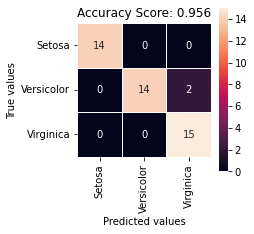

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print("Image Data Shape", iris.data.shape)
print("Label Data Shape", iris.target.shape)

xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size=0.3)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(xTrain, yTrain)
predictions = model.predict(xTest)

score = model.score(xTest, yTest)
print(score)

cm = metrics.confusion_matrix(yTest, predictions)
x_axis_labels = ('Setosa', 'Versicolor', 'Virginica')
y_axis_labels = ('Setosa', 'Versicolor', 'Virginica')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted values")
plt.ylabel("True values")
all_sample_title = 'Accuracy Score: %.3f' % score
plt.title(all_sample_title, size = 12)
plt.show()

Above we can see the confusion matrix, the accuracy score varies from run to run since we do not have a seed set. However it approximates to 0.94 score.

In [87]:
def classOfNeighbour(N, weight):
    knn = KNeighborsClassifier(n_neighbors=N, weights=weight)
    knn.fit(xTrain, yTrain)
    predictions = knn.predict(xTest)
    score = metrics.accuracy_score(yTest, predictions)
    return score


classificationByNUniform = np.zeros(5, dtype = float)
classificationByNDistance = np.zeros(5, dtype = float)
indexByK = np.zeros(5, dtype=int)
for i in range(5):
    iNUni = classOfNeighbour(i*20+1, "uniform")
    iNDist = classOfNeighbour(i*20+1, "distance")
    classificationByNUniform[i] = iNUni
    classificationByNDistance[i] = iNDist
    indexByK[i] = i*20+1

dfClassification = pd.DataFrame({"Uniform": classificationByNUniform, "Distance": classificationByNDistance}, index=indexByK)
print(dfClassification)

     Uniform  Distance
1   0.955556  0.955556
21  0.977778  0.977778
41  0.911111  0.977778
61  0.911111  0.977778
81  0.822222  0.977778
